# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("API_KEYS.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [72]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [73]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [74]:
btc_url

'https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD'

In [75]:
eth_url

'https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD'

In [76]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_value = btc_url["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!]
eth_value = eth_url["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

TypeError: string indices must be integers

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")


In [10]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()


AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3591541  348.96   

                                                            
                             high    low   close    volume  
time                                                        
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62796942

In [11]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [12]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [18]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
df_savings

NameError: name 'my_btc_value' is not defined

In [19]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Personal Savings")


NameError: name 'df_savings' is not defined

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto + total_shares_value

# Validate saving health
# YOUR CODE HERE!
#for loop?

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  298252778  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.16  261233795  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  302880969  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  280560712  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  211595249

In [49]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, num_simulation = 500, num_trading_days = 252*30)

In [50]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [51]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.020073e+00,1.012825e+00,1.012697e+00,9.968671e-01,1.021896e+00,9.949600e-01,9.957230e-01,1.008965e+00,1.010060e+00,9.994084e-01,...,9.981907e-01,9.784890e-01,9.888380e-01,9.878432e-01,9.977924e-01,1.023590e+00,1.015019e+00,9.918440e-01,9.891138e-01,9.965802e-01
2,1.011706e+00,1.001232e+00,1.029306e+00,9.936820e-01,1.023308e+00,9.817440e-01,1.010550e+00,1.033180e+00,1.008478e+00,9.952541e-01,...,9.841340e-01,9.889016e-01,1.006235e+00,9.871520e-01,1.015189e+00,1.018513e+00,1.040766e+00,9.910849e-01,1.001712e+00,1.000139e+00
3,1.032922e+00,1.013413e+00,1.031712e+00,9.786776e-01,1.005847e+00,9.872256e-01,1.026869e+00,1.038770e+00,1.012097e+00,9.921433e-01,...,9.828032e-01,1.005020e+00,1.033097e+00,9.887671e-01,9.970167e-01,1.029119e+00,1.057418e+00,9.895717e-01,1.011419e+00,9.996550e-01
4,1.045787e+00,1.033494e+00,1.035836e+00,9.800624e-01,9.970944e-01,9.863187e-01,1.044740e+00,1.025155e+00,1.026416e+00,1.004126e+00,...,9.923486e-01,1.023279e+00,1.042818e+00,9.968292e-01,9.986238e-01,1.017911e+00,1.056924e+00,9.935222e-01,1.022854e+00,9.944410e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.032668e+08,3.036870e+07,2.051904e+07,4.878823e+07,1.866098e+07,1.884705e+07,3.366425e+07,6.730612e+06,1.266594e+07,2.914816e+07,...,9.232773e+07,2.306850e+06,1.054299e+08,1.385367e+08,3.669350e+07,3.478118e+07,1.251155e+07,1.459585e+08,3.126699e+08,3.287834e+07
7557,2.035753e+08,3.090806e+07,2.085763e+07,4.870160e+07,1.882184e+07,1.908620e+07,3.396666e+07,6.676779e+06,1.285873e+07,2.937416e+07,...,9.189055e+07,2.294913e+06,1.041643e+08,1.378928e+08,3.680793e+07,3.493538e+07,1.269827e+07,1.461176e+08,3.146330e+08,3.302452e+07
7558,2.040566e+08,3.119483e+07,2.063192e+07,4.897389e+07,1.894825e+07,1.921332e+07,3.418933e+07,6.591278e+06,1.289846e+07,2.954880e+07,...,9.141871e+07,2.287828e+06,1.049350e+08,1.374291e+08,3.744701e+07,3.541734e+07,1.301605e+07,1.452168e+08,3.102504e+08,3.282890e+07
7559,2.045365e+08,3.133888e+07,2.060095e+07,4.963387e+07,1.896969e+07,1.929083e+07,3.467429e+07,6.603527e+06,1.308977e+07,2.909481e+07,...,9.306545e+07,2.288233e+06,1.062023e+08,1.374282e+08,3.746112e+07,3.604085e+07,1.298857e+07,1.446198e+08,3.110016e+08,3.336541e+07


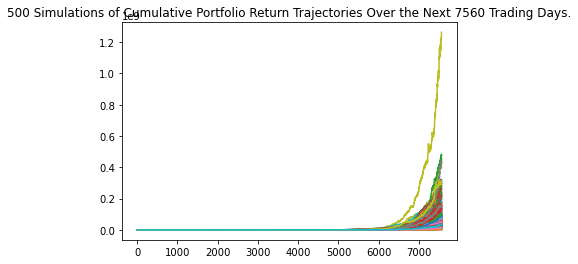

In [52]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

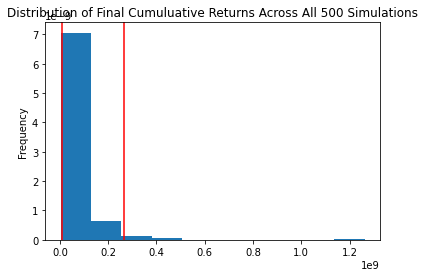

In [53]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           5.000000e+02
mean            5.941344e+07
std             8.501910e+07
min             2.285902e+06
25%             1.916541e+07
50%             3.542178e+07
75%             6.380281e+07
max             1.263661e+09
95% CI Lower    6.543778e+06
95% CI Upper    2.642923e+08
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [55]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $130875563470.34 and $5285845465864.97


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [56]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $196313345205.51 and $7928768198797.45


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [57]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [58]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989723,1.015080,1.006121,0.998561,1.003700,1.008449,1.001991,1.014991,1.003296,0.997721,...,1.008158,0.996013,1.021686,1.031606,0.988515,0.990154,1.003966,1.019425,1.012295,0.999224
2,0.999316,1.015416,1.020463,0.986815,0.956380,1.002223,1.020859,1.015568,1.002576,0.983380,...,1.017969,1.020539,1.020687,1.047294,0.996445,0.978862,0.999369,1.049228,1.024250,0.989102
3,1.008777,1.014233,1.017907,0.986507,0.960822,1.007655,1.024931,1.028507,1.011559,0.980540,...,1.021119,1.018903,1.022190,1.043855,1.003976,0.974489,1.005618,1.058797,1.030704,0.985626
4,1.009251,1.029720,1.023953,0.996352,0.982425,1.009361,1.016264,1.021898,1.006727,0.987839,...,1.050116,1.016883,1.028988,1.056657,0.988624,0.980300,0.997339,1.063153,1.022907,1.009513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,14.092245,16.937962,8.468835,16.508017,15.596916,14.390032,23.352356,12.811454,14.037281,17.434157,...,13.165268,17.588721,24.973040,23.703374,15.911766,7.805717,16.820473,21.606326,23.954067,12.579089
1257,14.054568,16.947950,8.581325,16.518444,15.741803,14.483619,23.309092,12.797677,14.235952,17.407640,...,13.201988,17.743853,24.682183,23.327368,15.790801,7.854769,17.054507,21.387142,24.511660,12.477229
1258,13.840715,16.983594,8.421074,16.698272,15.582435,14.563441,22.929817,12.751359,14.232418,17.680258,...,13.059558,17.933700,24.975365,23.527791,15.892981,7.848659,17.074882,21.120579,24.546459,12.414132
1259,13.743723,17.089304,8.528892,16.958762,15.286873,14.501212,23.261975,12.787940,14.197127,17.540312,...,13.034325,18.037179,25.465767,23.920516,16.047052,7.862561,17.176176,21.021079,24.673470,12.738227


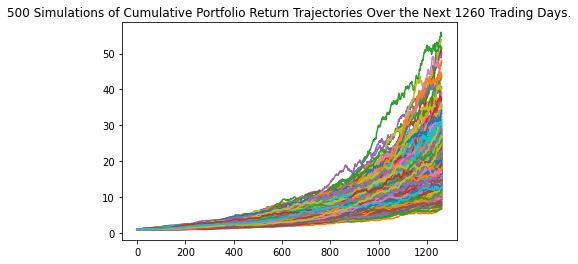

In [59]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_even_dist_five.plot_simulation()

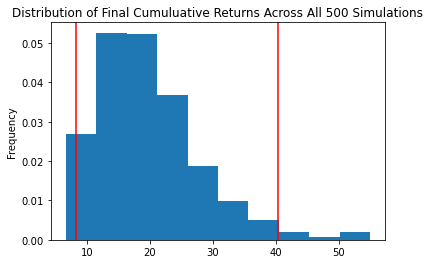

In [60]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_even_dist_five.plot_distribution()

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_five)

count           500.000000
mean             19.746139
std               8.252545
min               6.663314
25%              13.770017
50%              18.155568
75%              23.933161
max              54.943220
95% CI Lower      8.322436
95% CI Upper     40.259426
Name: 1260, dtype: float64


In [62]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $499346.17 and $2415565.57


### Ten Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [65]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.027073,1.025703,0.990758,1.005112,1.020326,0.991881,1.002525,0.994849,1.003048,0.990272,...,0.987751,1.015781,1.004742,1.004285,1.001688,1.016874,1.007562,0.981240,1.010164,0.999829
2,1.014312,1.023701,0.964678,1.021166,1.014014,0.978843,1.008620,0.986348,1.006631,0.994532,...,0.991823,1.002284,1.005086,1.020632,1.011904,1.023933,1.014551,0.985483,1.031157,0.978881
3,1.000552,1.022179,0.947298,1.030610,1.010558,0.979141,1.026601,0.991808,1.012532,0.993217,...,0.996233,1.022628,0.997905,1.029566,1.011935,1.011324,1.024031,0.988328,1.014026,0.972963
4,1.003340,1.024791,0.948626,1.038712,1.009207,0.988682,1.028697,0.994382,1.004045,1.012269,...,0.987716,1.018322,0.997544,1.023482,0.999201,1.025951,1.000181,0.989134,1.020011,0.969875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,567.435042,743.115373,125.211013,212.161543,354.346326,245.861967,584.653258,111.484770,525.645271,245.169016,...,1210.846489,671.631513,278.097284,483.523570,241.614165,446.419189,397.562464,538.062556,326.281648,439.990250
2517,563.680731,723.020999,124.781433,211.627147,355.065716,249.026570,584.218104,111.852138,519.758807,244.864038,...,1233.538143,661.875844,279.995075,485.003060,245.836846,453.969676,400.904735,541.219494,330.380048,447.576564
2518,565.554555,734.512092,122.742099,212.971098,354.211712,249.400993,582.653297,111.839923,508.579613,242.027883,...,1253.429148,648.088257,280.309201,486.353171,252.069769,453.878897,403.680145,541.317221,328.624855,443.217754
2519,559.745945,734.465776,123.353712,213.617806,356.637453,252.805523,578.502713,112.695533,508.513128,246.553111,...,1242.838678,654.938081,281.703874,488.501335,254.856502,462.842137,409.334431,539.624453,324.664713,448.209929


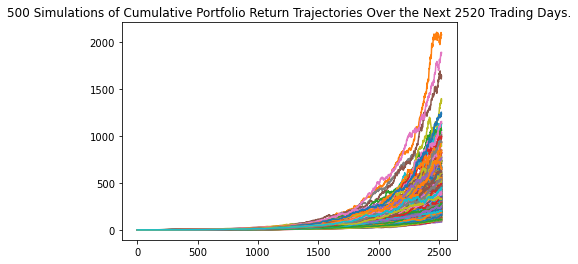

In [66]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_even_dist_ten.plot_simulation()

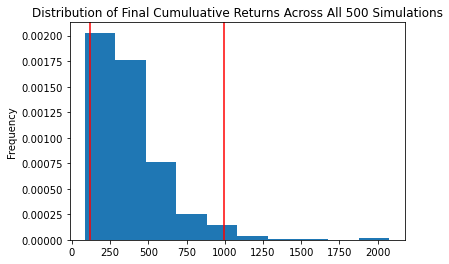

In [67]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_ten)

count            500.000000
mean             386.282266
std              240.743897
min               84.399011
25%              229.113032
50%              323.307753
75%              479.178815
max             2075.742418
95% CI Lower     114.977751
95% CI Upper     993.919807
Name: 2520, dtype: float64


In [69]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $6898665.06 and $59635188.41
